In [1]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [2]:
%matplotlib inline

In [3]:
if t.cuda.is_available():
    if t.cuda.device_count()>1:
        device = t.device('cuda:1')
    else:
        device = t.device('cuda')   
else:
    device = t.device('cpu')

In [4]:
device=t.device('cpu') #Overrride the above device choice

Generate the sample 2D distribution: uniform from unit circle.  

In [5]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)

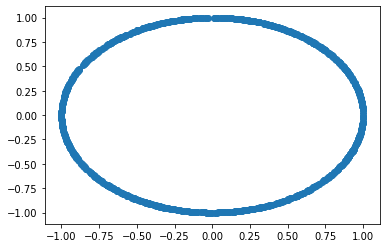

In [6]:
plt.scatter(data[:,0], data[:,1])

In [7]:
data_t = t.from_numpy(data)

In [8]:
data_t

tensor([[-0.9892, -0.1464],
        [ 0.9830,  0.1836],
        [ 0.2576, -0.9663],
        ...,
        [-0.9941, -0.1084],
        [-0.9982, -0.0597],
        [ 0.6383, -0.7698]])

In [9]:
discriminator = Sequential(Linear(2,1),  Sigmoid()) #dummy discriminator: please subsitute you own implementation 

In [10]:
discriminator = discriminator.to(device) 

In [11]:
generator = Sequential(Linear(2,2))# dummy generator: please subsitute you own implementation 

In [12]:
generator= generator.to(device)

In [13]:
out_t = generator(t.empty(1000,2, device=device).uniform_(-1,1));

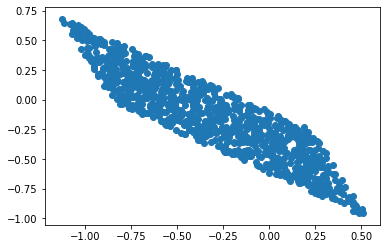

In [14]:
plt.scatter(out_t.data.cpu().numpy()[:,0],out_t.data.cpu().numpy()[:,1])

In [15]:
d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0002)

In [16]:
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 